<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())
names = ['subtype', 'class', 'indeks', 'n', 'm', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
         '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])




8750
   subtype  class  indeks    n   m   n/m  (n/m)^2   (n/m)^3       m/n  \
0        1      3       4  100  50   2.0     4.00     8.000  0.500000   
1       11      4       2   54   9   6.0    36.00   216.000  0.166667   
2       13      5       5   80   8  10.0   100.00  1000.000  0.100000   
3        8      3       9   20   5   4.0    16.00    64.000  0.250000   
4        3      3       1   20   8   2.5     6.25    15.625  0.400000   

    (m/n)^2   (m/n)^3   av.length    std.dev  median  range  min  max   k  
0  0.250000  0.125000   78.550003  14.426668    79.5     49   51  100  44  
1  0.027778  0.004630  100.444443  19.172178   103.0    100   52  152  36  
2  0.010000  0.001000  106.612503  53.127857   100.5    249    6  255  68  
3  0.062500  0.015625   74.550003  13.343538    78.0     47   51   98  17  
4  0.160000  0.064000   81.650002  15.661804    89.0     48   51   99  16  


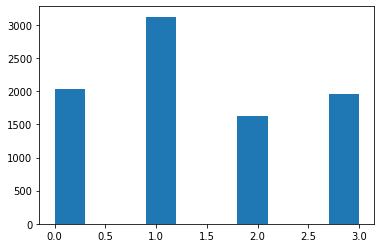

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = 9, activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(16, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 3,988
Trainable params: 3,988
Non-trainabl

In [5]:
from sklearn import preprocessing

X = preprocessing.normalize(X)
X = pd.DataFrame(X, columns=names)
print(X.head())

from sklearn.decomposition import PCA

#,'PC2','PC3','PC4','PC5','PC6','PC7','PC8
pca = PCA(n_components=9)
pca.fit(X)
X = pca.transform(X)
X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
X_modified = X

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)




    subtype     class    indeks         n         m       n/m   (n/m)^2  \
0  0.004865  0.014596  0.019461  0.486523  0.243261  0.009730  0.019461   
1  0.033273  0.012099  0.006050  0.163340  0.027223  0.018149  0.108893   
2  0.012004  0.004617  0.004617  0.073873  0.007387  0.009234  0.092341   
3  0.045097  0.016911  0.050734  0.112741  0.028185  0.022548  0.090193   
4  0.017159  0.017159  0.005720  0.114393  0.045757  0.014299  0.035748   

    (n/m)^3       m/n   (m/n)^2       (m/n)^3  av.length   std.dev    median  \
0  0.038922  0.002433  0.001216  6.081533e-04   0.382164  0.070189  0.386785   
1  0.653360  0.000504  0.000084  1.400488e-05   0.303826  0.057992  0.311556   
2  0.923413  0.000092  0.000009  9.234126e-07   0.098447  0.049059  0.092803   
3  0.360772  0.001409  0.000352  8.807911e-05   0.420243  0.075218  0.439691   
4  0.089369  0.002288  0.000915  3.660571e-04   0.467009  0.089580  0.509048   

      range       min       max         k  
0  0.238396  0.248127  0

In [6]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
#print(X_test_copy.iloc[0]['subtype'])

Epoch 1/600
454/454 [==============================] - 5s 9ms/step - loss: 1.1371 - accuracy: 0.4938 - val_loss: 1.0273 - val_accuracy: 0.5538
Epoch 2/600
454/454 [==============================] - 4s 8ms/step - loss: 0.8517 - accuracy: 0.6234 - val_loss: 0.7413 - val_accuracy: 0.6841
Epoch 3/600
454/454 [==============================] - 3s 7ms/step - loss: 0.6433 - accuracy: 0.7247 - val_loss: 0.6483 - val_accuracy: 0.7211
Epoch 4/600
454/454 [==============================] - 3s 7ms/step - loss: 0.5823 - accuracy: 0.7525 - val_loss: 0.6600 - val_accuracy: 0.7077
Epoch 5/600
454/454 [==============================] - 3s 6ms/step - loss: 0.5572 - accuracy: 0.7592 - val_loss: 0.6026 - val_accuracy: 0.7399
Epoch 6/600
454/454 [==============================] - 3s 7ms/step - loss: 0.5508 - accuracy: 0.7620 - val_loss: 0.6111 - val_accuracy: 0.7466
Epoch 7/600
454/454 [==============================] - 4s 8ms/step - loss: 0.5413 - accuracy: 0.7659 - val_loss: 0.6162 - val_accuracy: 0.7298

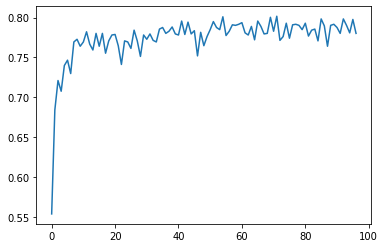

In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 16, 
                    epochs = 600, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])



In [8]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

accuracy: 79.10%


accuracy: 79.10%


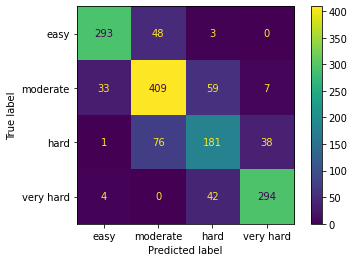

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

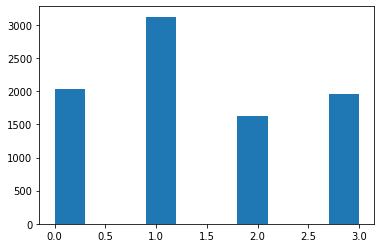

In [10]:
y_new = np.array(y_new)
plt.hist(y_new)
#plt.title('0->[0,2000) : 1->[2000,99999]')
plt.show()

ROC AUC score: 0.8558575426551313


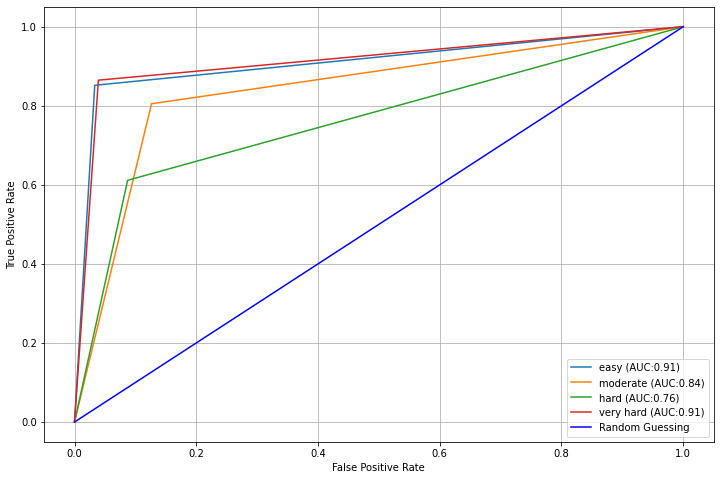

In [11]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()